# Installation et imports

### Installation des modules 

In [418]:
%pip install Pandas


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [419]:
%pip install Matplotlib 


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [420]:
%pip install Scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [421]:
%pip install Numpy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [537]:
%pip install tqdm
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 2.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Import

In [597]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as plt
import matplotlib.pyplot as plt
import math


# Répartition des données

### Répartition holdout 

In [424]:
from sklearn.model_selection import train_test_split

In [507]:
#fRépartition des données en base d’apprentissage et de tests en utilisant l'algorithmes holdout 
def holdout(dataframe, colonne_predict, num_rep, train_s, test_s ):
        liste_data_train_test = [] 
        liste_data = []
        clean_data = dataframe.drop(colonne_predict, axis = 1) #supprime du dataframe la colonne qu'on souhaite prédire
        y = dataframe[colonne_predict] #sélectionne la colonne à prédire
        for i in range(num_rep): # on crée n répartition
                X_train, X_test, y_train, y_test = train_test_split(clean_data,y, train_size= train_s, test_size = test_s) #sépare clean_data et y en base de test et d'apprentissage
                X_train = X_train.reset_index(drop=True) #on remet à jour la numérotation des lignes
                y_train = y_train.reset_index(drop=True)
                X_test = X_test.reset_index(drop=True)
                y_test = y_test.reset_index(drop=True)
                liste_data_train_test.append([X_train, X_test, y_train, y_test]) #sauvegarde dans une liste 
        return liste_data_train_test # liste contenant n quadruplet

### Répartition Leave One Out

In [427]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier

In [670]:
#fRépartition des données en base d’apprentissage et de tests en utilisant l'algorithmes leave one out 
def leaveoneout(dataframe, colonne_predict,k, distance_metric):
    liste_y_pred = []
    liste_y_test = []
    X = dataframe.drop(colonne_predict, axis = 1) #supprime du dataframe la colonne qu'on souhaite prédire
    y = dataframe[colonne_predict] #sélectionne la colonne à prédire
    LOO = LeaveOneOut() #création objet leave one out
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric) #création objet knn
    
    for train_index, test_index in (LOO.split(X)): #train_index = toute les lignes sauf une, train_index = une ligne, LOO.split(X) = sépare la base de données
        X_train, X_test = X.iloc[train_index], X.iloc[test_index] # sépare X en train et test selon les indices des lignes
        y_train, y_test = y.iloc[train_index], y.iloc[test_index] # sépare y en train et test selon les indices des lignes
        knn.fit(X_train, y_train) #knn apprentissage
        y_pred = knn.predict(X_test) #knn prediction 
        liste_y_pred.append(y_pred) # sauvegarde des y prédit dans une liste
        liste_y_test.append(y_test) # sauvegarde des y test dans une liste
        
    return liste_y_pred, liste_y_test # on retourne les listes de y predit et test

# Classification avec KNN

### Fonctions from scratch

In [734]:
#Fonction de classification knn
def KnnClassification(ligne,y_train,df,k, distance_metric):
    dictList = [None] * len(df)
    liste_y_pred = []

    if distance_metric == 'euclidean':
        for index, row in df.iterrows():
            dictList[index] = np.linalg.norm(ligne - row)

    if distance_metric == 'manhattan' : 
        for index, row in df.iterrows():
            dictList[index] = np.sum(np.abs(ligne - row))
        
    sorted_values = sorted(enumerate(dictList), key=lambda x: x[1])[:k]
    for index,value in sorted_values:
        liste_y_pred.append(y_train[index])
    
    y_pred = np.bincount(liste_y_pred).argmax()
        
    return y_pred

### Scikit learn

In [721]:
#prediction holdout sklearn
def  KnnClassification_sk_learn(liste_data,k, distance_metric):
    knn = KNeighborsClassifier(n_neighbors=k, metric = distance_metric)
    liste_y_pred_holdout_sk = []
    liste_y_test_holdout_sk = []
    for i in range(len(liste_data)):
        X_train = liste_data[i][0]
        X_test = liste_data[i][1]
        y_train = liste_data[i][2]
        y_test = liste_data[i][3]
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        liste_y_pred_holdout_sk.append(y_pred)
        liste_y_test_holdout_sk.append(y_test)
    return liste_y_pred_holdout_sk, liste_y_test_holdout_sk

### Calcul de score

In [663]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [698]:
def reduire_data(data): 
    counts = data['descr_grav'].value_counts()

    total_0 = counts[0]/len(data)
    total_1 = counts[1]/len(data)
    total_2 = counts[2]/len(data)
    total_3 = counts[3]/len(data)

    Proportion_0 = data[data['descr_grav'] == 0].sample(n=int(7500*total_0))
    Proportion_1 = data[data['descr_grav'] == 1].sample(n=int(7500*total_1))
    Proportion_2 = data[data['descr_grav'] == 2].sample(n=int(7500*total_2))
    Proportion_3 = data[data['descr_grav'] == 3].sample(n=int(7500*total_3))

    data_reduit = pd.concat([Proportion_0,Proportion_1, Proportion_2, Proportion_3])
    data_reduit = data_reduit.reset_index(drop=True)
    data_reduit = data_reduit.drop(columns=["latitude", "longitude"])
    
    return data_reduit

In [699]:
data = pd.read_csv("../dfClean.csv")
data_reduit = reduire_data(data)

In [694]:
def resultat_leaveoneout(data, param_predit, distance_metric):

    liste_score = []

    for k in [5,7,10] : 
        #Répartition leave One Out
        y_pred_LOO, y_test_LOO = leaveoneout(data, param_predit, k, distance_metric)
        matrice_confusion = confusion_matrix(y_test_LOO,y_pred_LOO, normalize='true')
        Display = ConfusionMatrixDisplay(confusion_matrix = matrice_confusion, display_labels= ['indemme', 'blessé', 'hospitalisé', 'tué'])
        Display.plot(values_format=".2%")
        plt.show()

        # Score répartition leave One Out
        accuracy_LOO = accuracy_score(y_test_LOO, y_pred_LOO)
        liste_score.append(accuracy_LOO*100)

    plt.plot([5,7,10], liste_score, label='Score')

    # Ajouter des légendes et des titres
    plt.xlabel('Valeurs de K')
    plt.ylabel('Score')
    plt.title('Scores leave one out knn en fonction de K')
    plt.legend()

    # Afficher le graphique
    plt.show()


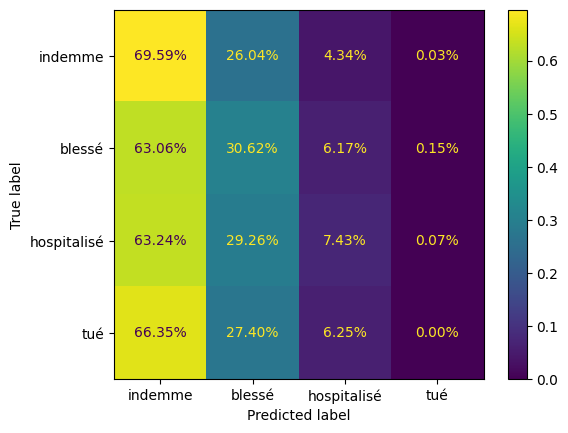

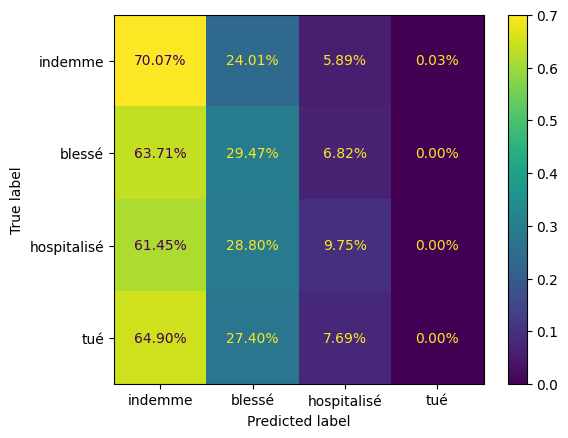

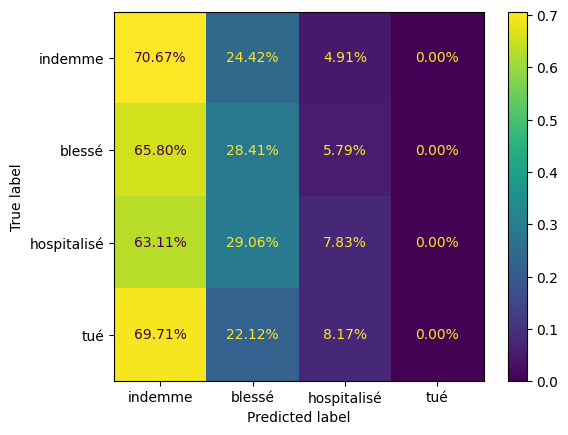

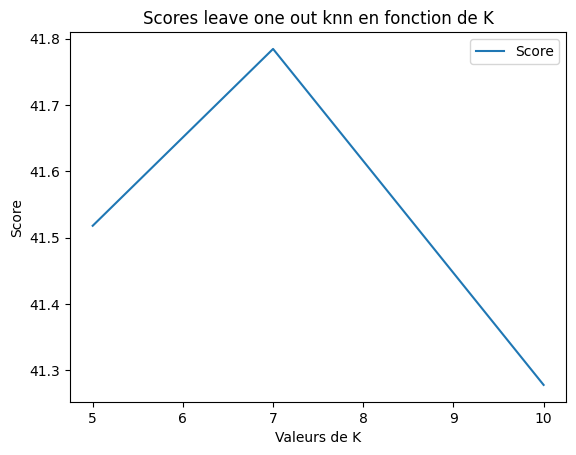

In [700]:
resultat_leaveoneout(data_reduit, "descr_grav", 'manhattan')

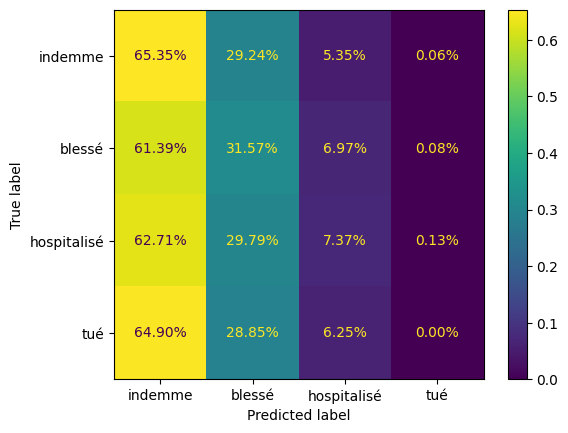

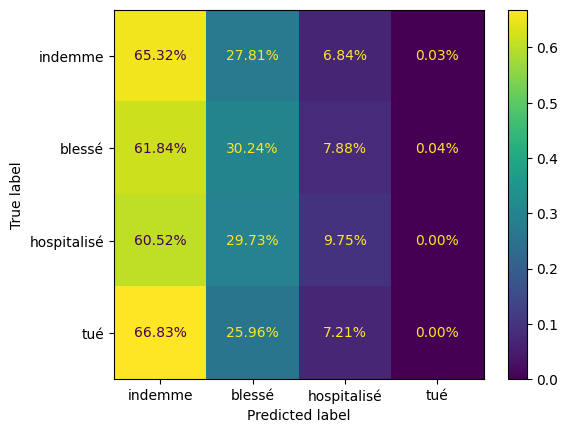

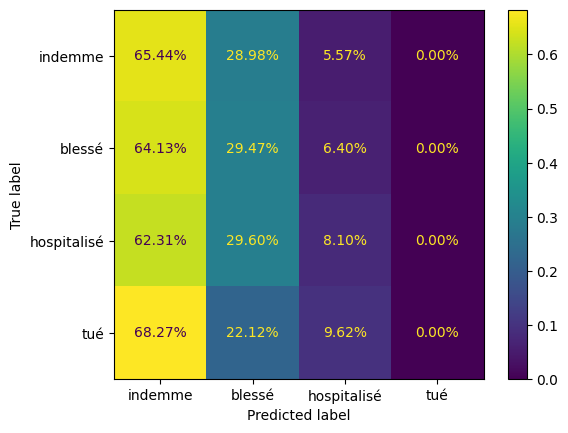

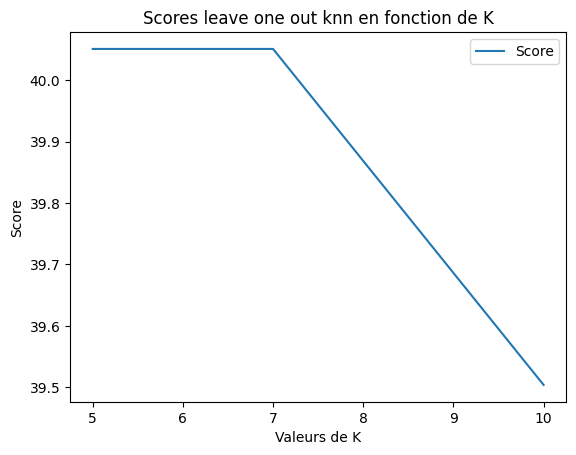

In [701]:
resultat_leaveoneout(data_reduit, "descr_grav", 'euclidean')

In [743]:
def score_holdout_scratch(data, param_predit, distance_metric): 
    #Répartition hold out
    liste_data_holdout  = holdout(data, param_predit, 5, 0.8, 0.2)

    # Prediction holdout from scratch
    #sélection 
    X_test_0 = liste_data_holdout[0][1]
    y_train_0  = liste_data_holdout[0][2]
    X_train_0 = liste_data_holdout[0][0]
    y_test_0 =  liste_data_holdout[0][3]
   

    liste_score = []

    for k in [5,7,10]:
        liste_y_pred_holdout = []
    
        for i in range(len(X_test_0)):
            y_pred_holdout = KnnClassification(X_test_0.loc[i], y_train_0, X_train_0, k, distance_metric)
            liste_y_pred_holdout.append(y_pred_holdout)

        matrice_confusion = confusion_matrix(y_test_0, liste_y_pred_holdout, normalize='true')
        Display = ConfusionMatrixDisplay(confusion_matrix = matrice_confusion, display_labels= ['indemme', 'blessé', 'hospitalisé', 'tué'])
        Display.plot(values_format=".2%")
        plt.show()

        accuracy = accuracy_score(y_test_0, liste_y_pred_holdout)
        liste_score.append(accuracy*100)

    
    plt.plot([5,7,10], liste_score, label='Score')

    # Ajouter des légendes et des titres
    plt.xlabel('Valeurs de K')
    plt.ylabel('Score')
    plt.title('Scores holdout knn en fonction de K en distance '+ distance_metric)
    plt.legend()

    # Afficher le graphique
    plt.show()
        

    

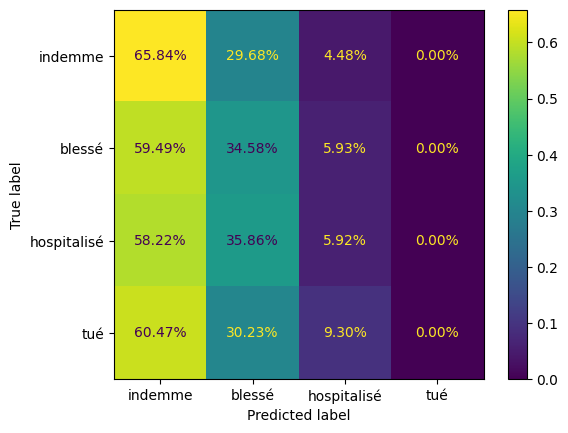

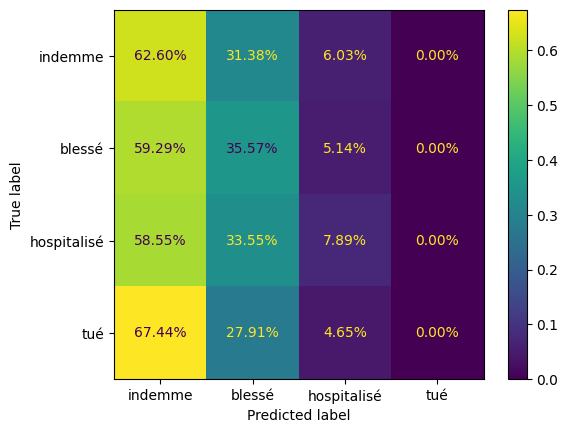

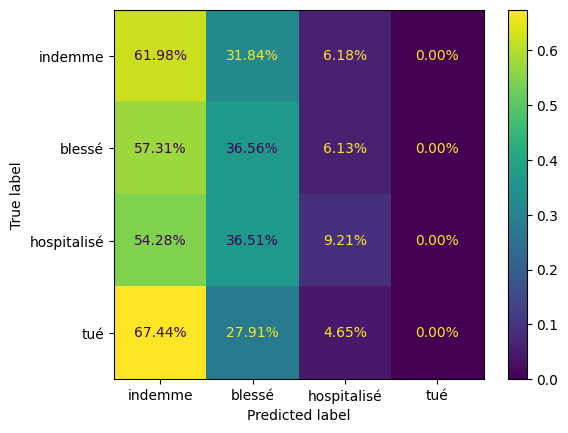

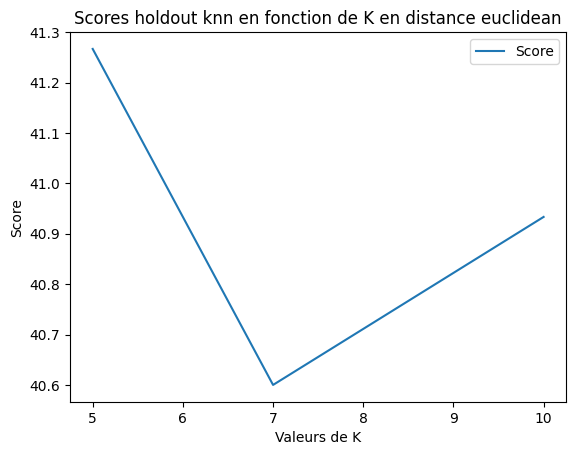

In [745]:
score_holdout_scratch(data_reduit, "descr_grav", 'euclidean') 

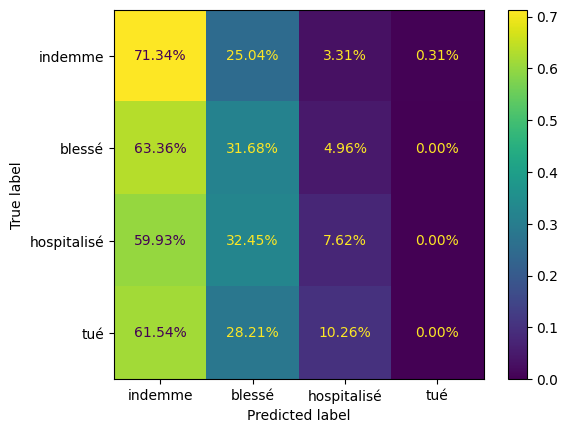

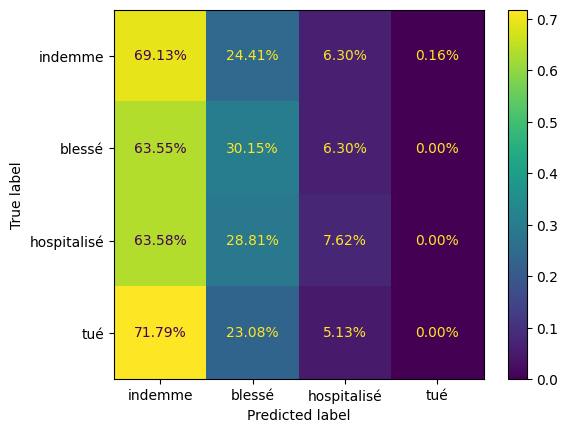

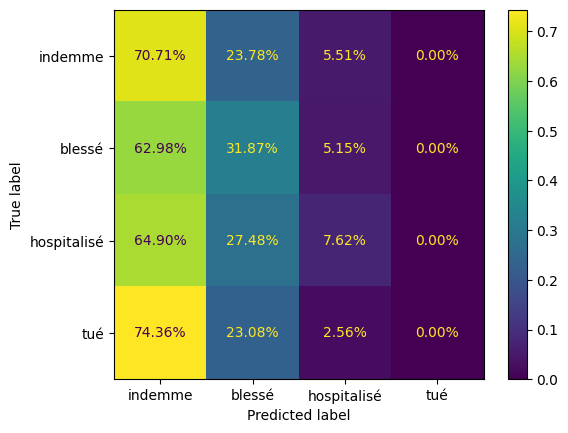

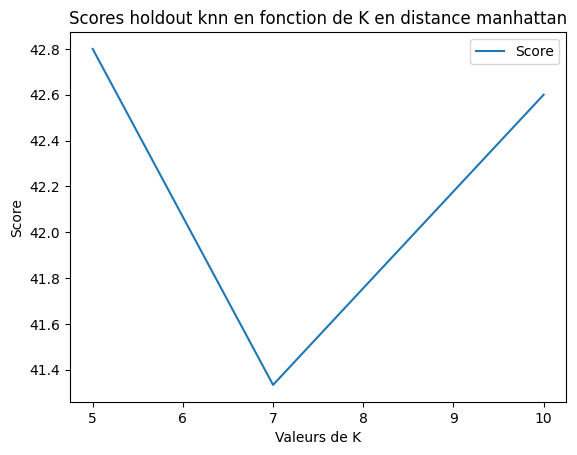

In [744]:
score_holdout_scratch(data_reduit, "descr_grav", 'manhattan') 

In [788]:
def resultat_holdout_sk(data, param_predit, distance_metric):

    #Score prediction holdout scikit learn
    liste_data_holdout  = holdout(data, param_predit, 5, 0.8, 0.2)
    liste_accuracy_holdout_sk = []
    liste_moyenne_score = []


    for k in [5,7,10]:
        liste_y_pred_holdout_sk, liste_y_test_holdout_sk = KnnClassification_sk_learn(liste_data_holdout,k, distance_metric)
        
        matrice_confusion = confusion_matrix(liste_y_test_holdout_sk[0], liste_y_pred_holdout_sk[0], normalize='true')
        Display = ConfusionMatrixDisplay(confusion_matrix = matrice_confusion, display_labels= ['indemme', 'blessé', 'hospitalisé', 'tué'])
        Display.plot(values_format=".2%")
        plt.show()

        liste_score =[]
        for i in range(5):
            accuracy_holdout_sk = accuracy_score(liste_y_test_holdout_sk[i], liste_y_pred_holdout_sk[i])
            liste_score.append(accuracy_holdout_sk)
        liste_accuracy_holdout_sk.append(liste_score)

    for j in range(len(liste_accuracy_holdout_sk)):
        moyenne_score = np.mean(liste_accuracy_holdout_sk[j])
        liste_moyenne_score.append(moyenne_score)

    plt.plot([5,7,10], liste_accuracy_holdout_sk)
    plt.plot([5,7,10], liste_moyenne_score, label = 'mean')

    # Ajouter des légendes et des titres
    plt.xlabel('Valeurs de K')
    plt.ylabel('Scores')
    plt.title('Scores holdout knn en fonction de K en distance '+ distance_metric)
    plt.legend()

    # Afficher le graphique
    plt.show()
        

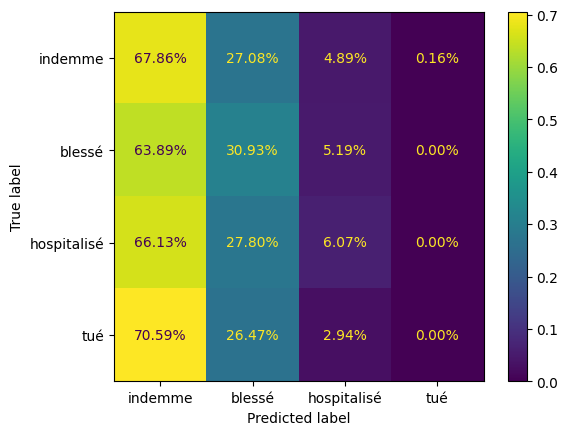

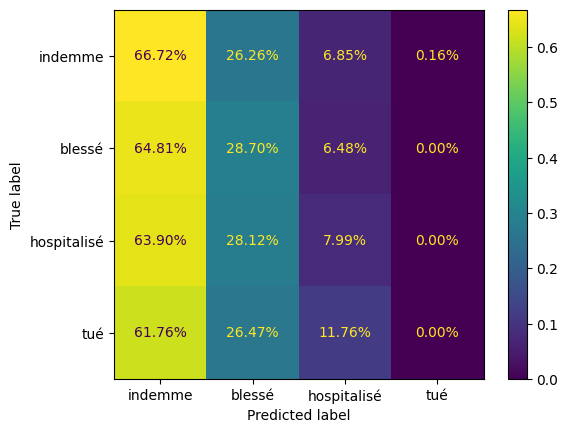

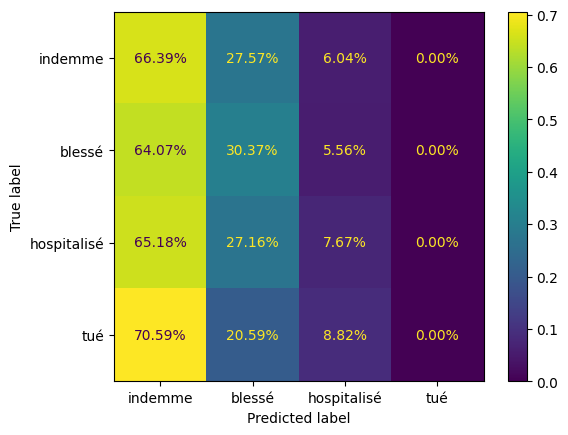

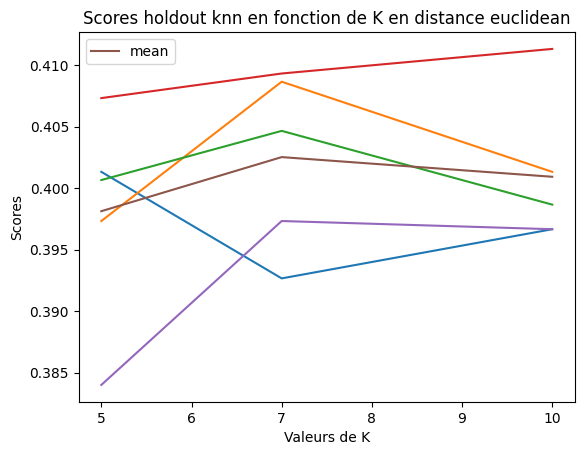

In [789]:
resultat_holdout_sk(data_reduit,  "descr_grav", 'euclidean')

# Évaluation quantitative des résultats

### Évaluation sur les données d'apprentissage

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [588]:
def evaluation(objet, X, Y):
    #calcul taux de classification
    taux_classification = cross_val_score(objet, X, Y, scoring='accuracy')
    #Moyenne taux de classification
    moyenne_taux_classification = np.mean(taux_classification)
    #prédiction 
    Y_pred = cross_val_predict(objet, X, Y)
    #Calcul du score (taux d'apprentissage)
    accuracy = accuracy_score(Y, Y_pred)
    # Matrice de confusion à partir des classes réelle et celles prédites
    matrice_confusion = ConfusionMatrixDisplay.from_predictions(Y, Y_pred, normalize="true",  values_format=".0%") #résultat en pourcentage
    # Précision du modèle
    precision = precision_score(Y, Y_pred, average='weighted')
    # Rappel du modèle
    rappel = recall_score(Y, Y_pred, average='weighted')

    return taux_classification, moyenne_taux_classification, Y_pred, accuracy, matrice_confusion, precision, rappel



### Évaluation sur les données de test